#Library Imports and Styling Setup

* **Loads all core libraries** needed for data analysis ($\texttt{numpy}$, $\texttt{pandas}$), visualization ($\texttt{matplotlib}$, $\texttt{seaborn}$), date/time parsing, model saving ($\texttt{pickle}$), and file management ($\texttt{os}$).
* **Sets a clean visual style** with Seaborn’s $\texttt{whitegrid}$ background and the “$\texttt{viridis}$” color palette for better visual contrast.
* **Suppresses warning messages** to keep the notebook output clean.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle
import os
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
import warnings
warnings.filterwarnings('ignore')

#Load the Dataset

* **Loads the Seoul Bike Sharing dataset** into a DataFrame named `bike_rental_df`.
* **Uses $\texttt{encoding='unicode_escape'}$** to handle special characters in the CSV.

In [ ]:
try:
    bike_rental_df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
except FileNotFoundError:
    print("Error Not Founnd 'SeoulBikeData.csv'")

print("Dataset loaded successfully.")

Dataset loaded successfully.


#Dataset Overview

In [ ]:
print("Dataset Shape :")
print(bike_rental_df.shape)
print("\nDataset Columns :")
print(bike_rental_df.columns)
print("\n Dataset Head :")
print(bike_rental_df.head())
print("\n Dataset Tail :")
print(bike_rental_df.tail())
print("\n Dataset Info :")
bike_rental_df.info()
print("\n Dataset Description (All Columns) :")
print(bike_rental_df.describe(include='all').T)
print("\n Null Value Check :")
print(bike_rental_df.isnull().sum())

Dataset Shape :
(8760, 14)

Dataset Columns :
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

 Dataset Head :
         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2       

### Interpretation:

* **Shape & Columns**:
    * The dataset comprises **8,760 rows** and **14 columns**, signifying hourly data collected over one full year (365 days $\times$ 24 hours).
    * Columns consist of both numerical values (e.g., temperature, humidity) and categorical variables (e.g., holiday, season). The primary target variable is $\texttt{Rented Bike Count}$.

* **Head & Tail**:
    * The $\texttt{head()}$ and $\texttt{tail()}$ methods provide a preview of the initial and final five entries, respectively. This confirms the chronological arrangement of the data, spanning from December 1, 2017, to November 30, 2018.

* **$\texttt{info()}$ Summary**:
    * Crucially, all columns are reported as **non-null**, indicating a complete dataset.
    * Data types include $\texttt{int64}$, $\texttt{float64}$, and $\texttt{object}$ (for date and categorical fields).
    * This summary confirms a clean and well-structured dataset, suitable for immediate processing.

* **$\texttt{describe(include='all')}$**:
    * This function yields comprehensive statistical summaries for both numerical and categorical columns.
    * For numerical values, it provides central tendency and dispersion metrics: $\texttt{mean}$, $\texttt{std}$ (standard deviation), $\texttt{min}$ (minimum), $\texttt{max}$ (maximum), and quartile values ($\texttt{25\%}$, $\texttt{50\%}$ (median), $\texttt{75\%}$). These are crucial for later normalization or scaling procedures.
    * For categorical data, it offers $\texttt{top}$ (most frequent value) and $\texttt{freq}$ (frequency of the most frequent value), valuable insights for encoding strategies.

* **Null Check**:
    * A thorough check reveals **0 missing values** across all columns, eliminating the need for any imputation techniques.

#Feature Engineering: Date Transformation

In [ ]:
bike_rental_df["Date"] = pd.to_datetime(bike_rental_df["Date"], format='%d/%m/%Y')
bike_rental_df["Weekday"] = bike_rental_df["Date"].dt.day_name()
bike_rental_df["Day_of_Month"] = bike_rental_df["Date"].dt.day
bike_rental_df["Month"] = bike_rental_df["Date"].dt.month
bike_rental_df["Year"] = bike_rental_df["Date"].dt.year
bike_rental_df.drop("Date", axis=1, inplace=True)
print("\n Dataset Info After Date Transformation :")
bike_rental_df.info()
print("\n Dataset Head After Date Transformation :")
print(bike_rental_df.head())


 Dataset Info After Date Transformation :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekd

### Interpretation: Date Feature Engineering

* **Converts the `Date` column** from its original string format to a proper `datetime` object, using the `strptime` directive `$%d/%m/%Y$`. This conversion is crucial as it enables robust time-based analysis and manipulation.

* **Derives four new temporal features** from the converted `Date` column:
    * `Weekday`: A categorical representation of the day of the week (e.g., Monday, Tuesday).
    * `Day_of_Month`: An integer representing the day within the month (ranging from 1 to 31).
    * `Month`: An integer representing the month of the year (from 1 to 12).
    * `Year`: An integer indicating the year (either 2017 or 2018).

* **Drops the original `Date` column** to eliminate redundancy and prevent potential multicollinearity issues, as its information is now encapsulated in the newly created features.

* As a result of these transformations, the DataFrame now contains **17 columns**, with the temporal features explicitly extracted, which is beneficial for more granular modeling and analysis.

#Exploratory Data Analysis (EDA) — Target Variable Distribution

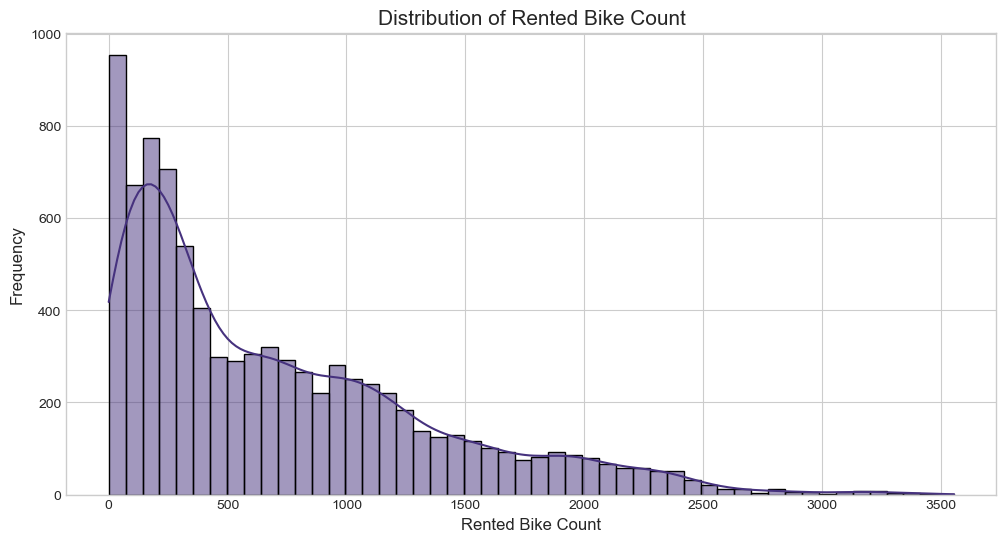

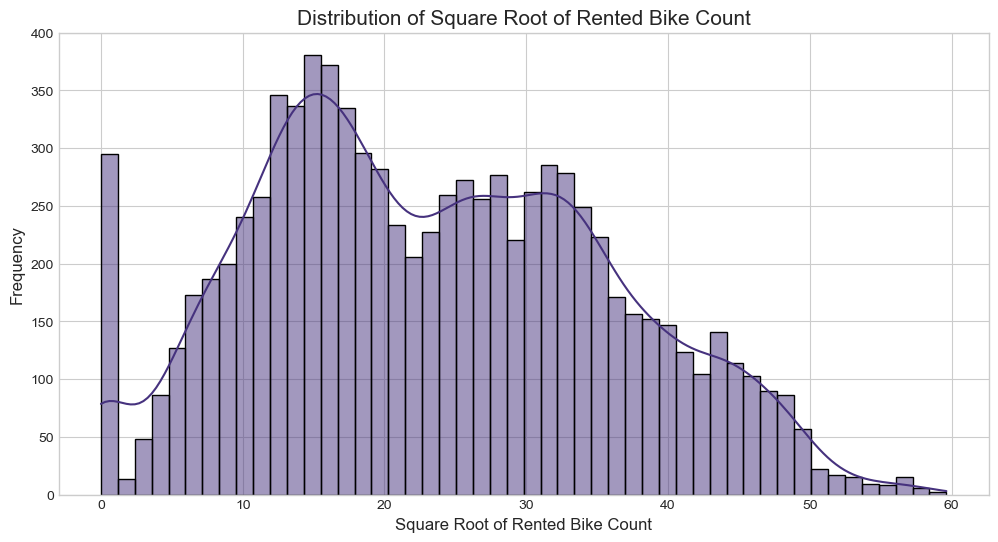

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(bike_rental_df["Rented Bike Count"], kde=True, bins=50)
plt.title('Distribution of Rented Bike Count', fontsize=15)
plt.xlabel('Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(np.sqrt(bike_rental_df["Rented Bike Count"]), kde=True, bins=50)
plt.title('Distribution of Square Root of Rented Bike Count', fontsize=15)
plt.xlabel('Square Root of Rented Bike Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Interpretation:

* The **first plot** visually demonstrates that the `Rented Bike Count` (our target variable) exhibits a **right-skewed distribution**. This means there is a concentration of observations at lower bike rental counts, with a long tail extending towards higher values.

* The **second plot** illustrates the effect of applying a **square root transformation** to the target variable. This transformation effectively reduces the skewness, resulting in a distribution that is significantly more symmetric and approximates a normal distribution.

* A more normally distributed target variable is generally desirable in statistical modeling, as it can lead to:
    * **Better residual behavior**: Residuals (the differences between observed and predicted values) are more likely to be normally distributed, which is an assumption for many linear models.
    * **Improved model stability**: Models built on normally distributed targets tend to be more stable and provide more reliable inferences.

#EDA: Bike Rentals Over Time

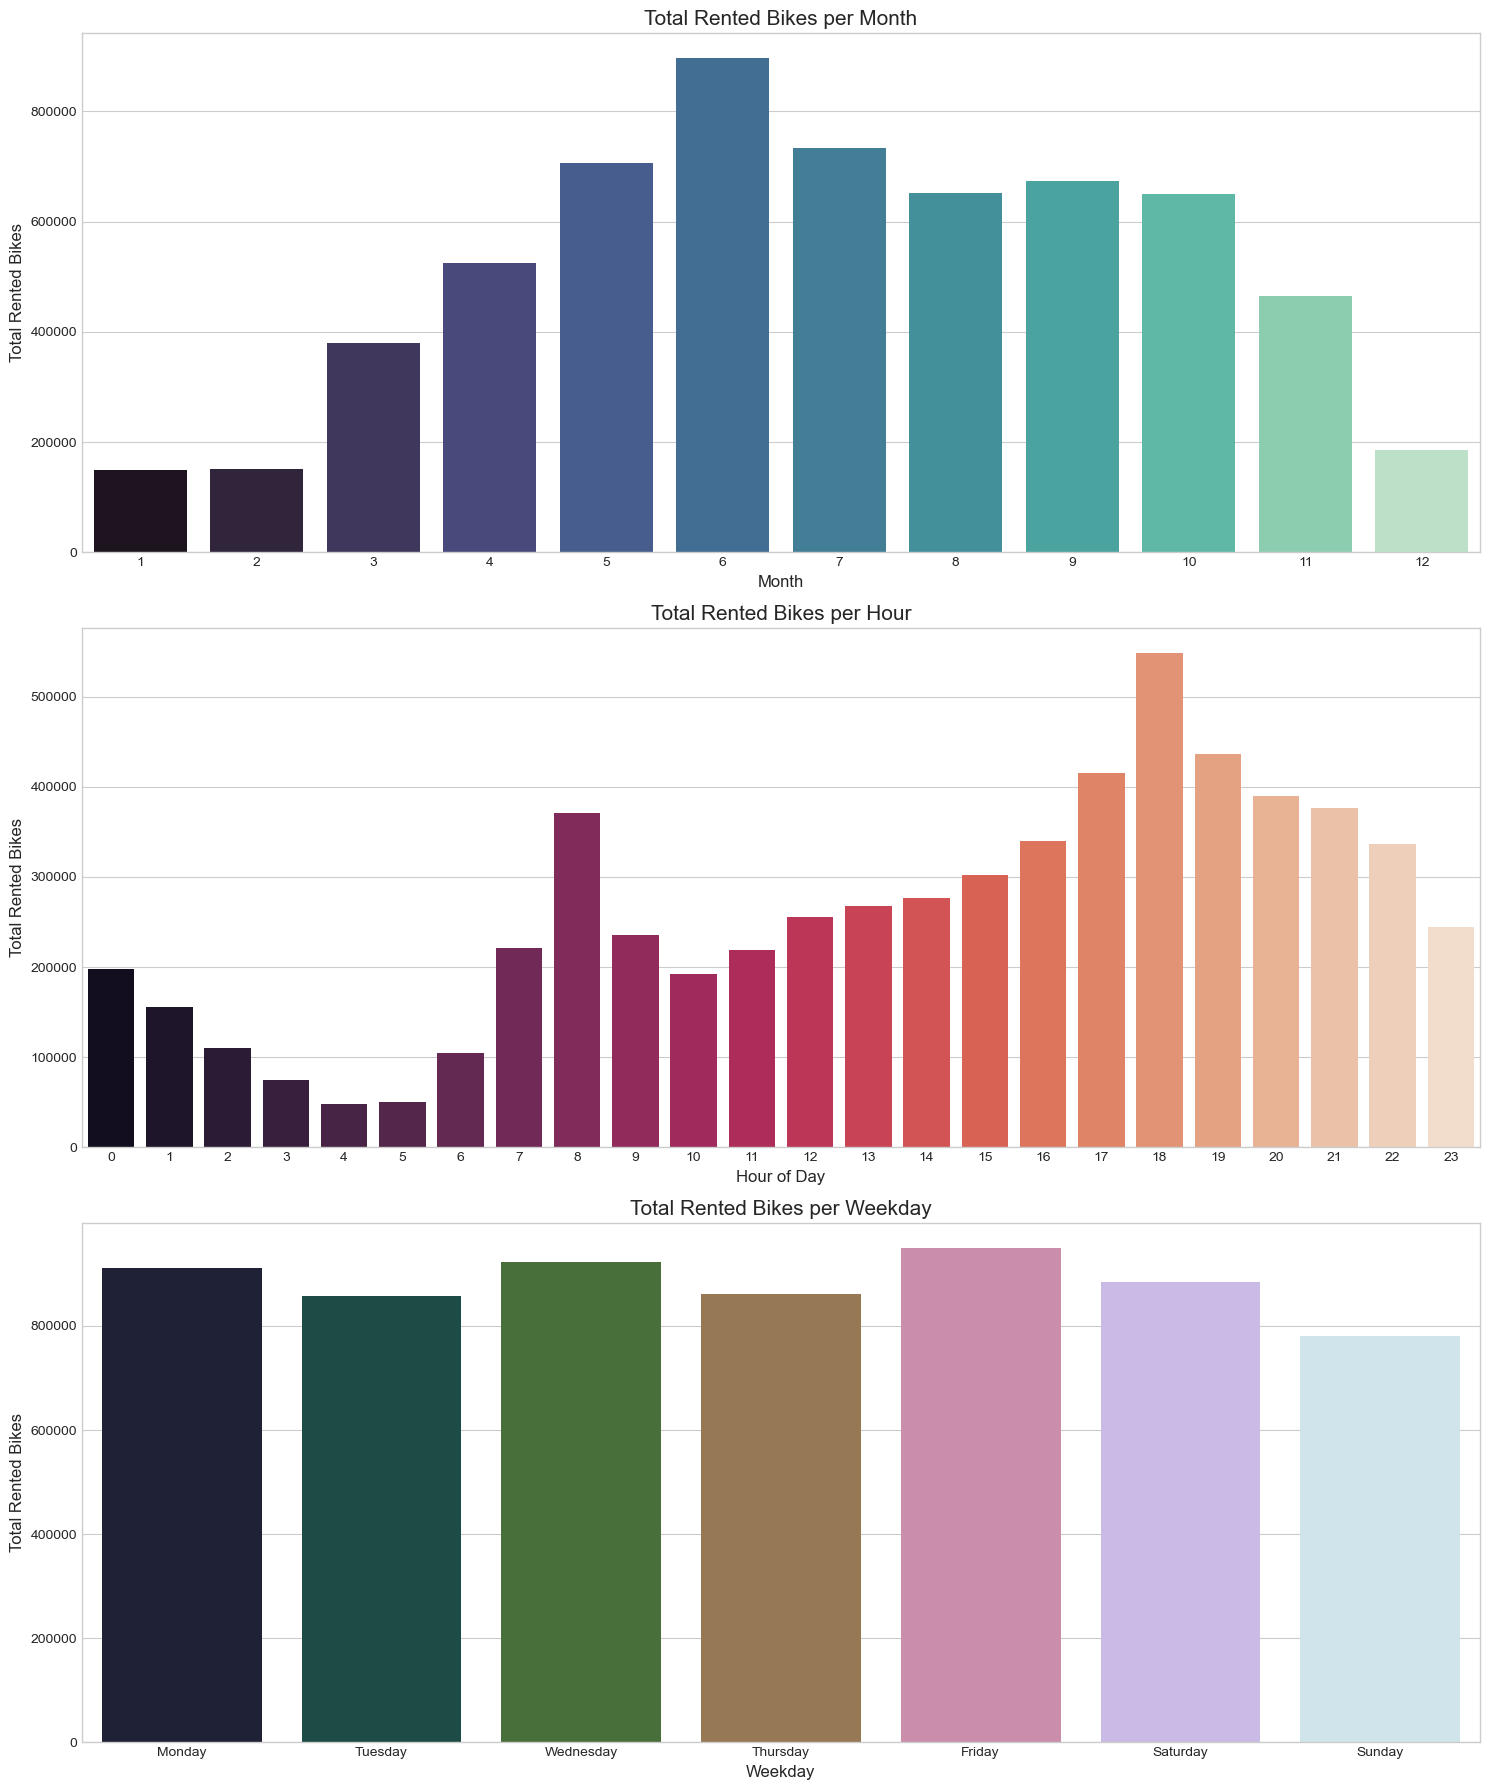

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(15, 18))
monthly_rentals = bike_rental_df.groupby("Month")["Rented Bike Count"].sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=monthly_rentals, ax=axes[0], palette="mako")
axes[0].set_title('Total Rented Bikes per Month', fontsize=15)
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Total Rented Bikes', fontsize=12)
hourly_rentals = bike_rental_df.groupby("Hour")["Rented Bike Count"].sum().reset_index()
sns.barplot(x="Hour", y="Rented Bike Count", data=hourly_rentals, ax=axes[1], palette="rocket")
axes[1].set_title('Total Rented Bikes per Hour', fontsize=15)
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Total Rented Bikes', fontsize=12)
weekday_rentals = bike_rental_df.groupby("Weekday")["Rented Bike Count"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
]).reset_index()
sns.barplot(x="Weekday", y="Rented Bike Count", data=weekday_rentals, ax=axes[2], palette="cubehelix")
axes[2].set_title('Total Rented Bikes per Weekday', fontsize=15)
axes[2].set_xlabel('Weekday', fontsize=12)
axes[2].set_ylabel('Total Rented Bikes', fontsize=12)
plt.tight_layout()
plt.show()

### Interpretation:

* **Monthly Trend**:
    * Bike rentals consistently **peak in June**, strongly indicating a significant seasonal dependence.
    * Conversely, the **winter months exhibit the lowest demand**, aligning with colder weather conditions.

* **Hourly Trend**:
    * The data reveals **two distinct daily peaks** in rental activity: one in the **morning (around 8 AM)** and another in the **evening (between 5 PM and 7 PM)**. These peaks are highly suggestive of typical commuting patterns.

* **Weekday Trend**:
    * Rental volumes are **highest on Fridays**, possibly reflecting a blend of end-of-week commuting and early weekend leisure.
    * Conversely, **Sundays show the lowest rental figures**, which implies that the bike sharing service is used more for weekday commuting than for weekend recreational activities.

#EDA: Categorical Features vs. Rented Bike Count

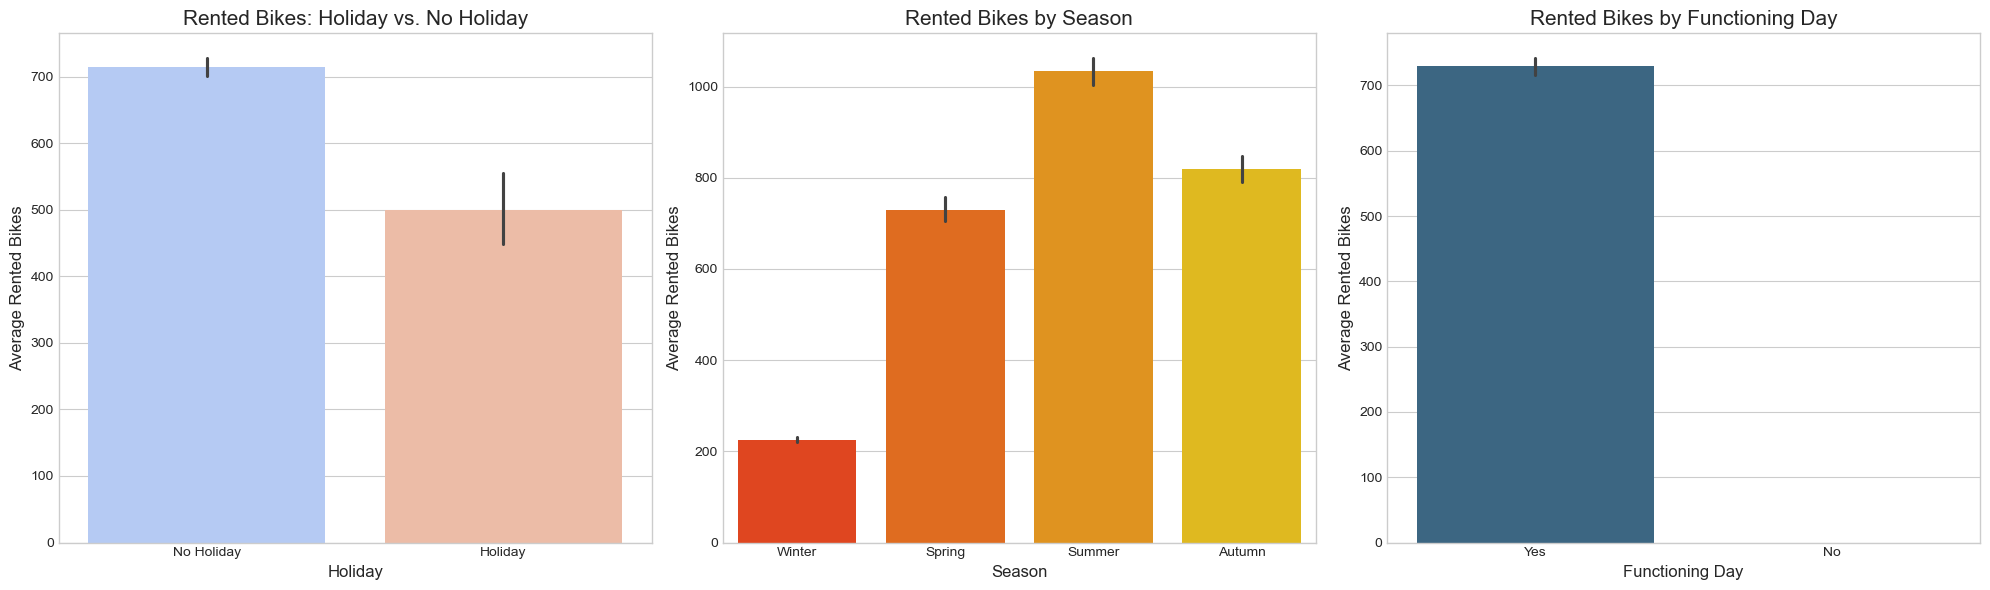

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.barplot(x="Holiday", y="Rented Bike Count", data=bike_rental_df, ax=axes[0], palette="coolwarm")
axes[0].set_title('Rented Bikes: Holiday vs. No Holiday', fontsize=15)
axes[0].set_xlabel('Holiday', fontsize=12)
axes[0].set_ylabel('Average Rented Bikes', fontsize=12)
sns.barplot(x="Seasons", y="Rented Bike Count", data=bike_rental_df, ax=axes[1], palette="autumn")
axes[1].set_title('Rented Bikes by Season', fontsize=15)
axes[1].set_xlabel('Season', fontsize=12)
axes[1].set_ylabel('Average Rented Bikes', fontsize=12)
sns.barplot(x="Functioning Day", y="Rented Bike Count", data=bike_rental_df, ax=axes[2], palette="viridis")
axes[2].set_title('Rented Bikes by Functioning Day', fontsize=15)
axes[2].set_xlabel('Functioning Day', fontsize=12)
axes[2].set_ylabel('Average Rented Bikes', fontsize=12)
plt.tight_layout()
plt.show()

### Interpretation:

* **Holiday vs. No Holiday**:
    * There is a significant reduction in rented bikes on **holidays** compared to non-holidays.
    * This pattern strongly suggests that **commuting is a primary driver** for bike rentals, as holiday periods typically see reduced commuting activity.

* **Seasonal Variation**:
    * **Summer** records the highest average bike rentals, followed by **Autumn** and **Spring**.
    * **Winter** consistently shows the lowest rental figures, which is likely attributable to more severe weather conditions (e.g., cold, snow, ice) making cycling less appealing.

* **Functioning Day**:
    * The number of rented bikes **drops sharply** when it is designated as a "not functioning day" (e.g., due to public shutdowns, system maintenance, or other operational reasons).
    * This indicates that **operational availability and the system's "functioning" status directly and significantly impact usage**.

#EDA: Numerical Features vs. Rented Bike Count (Scatter Plots)

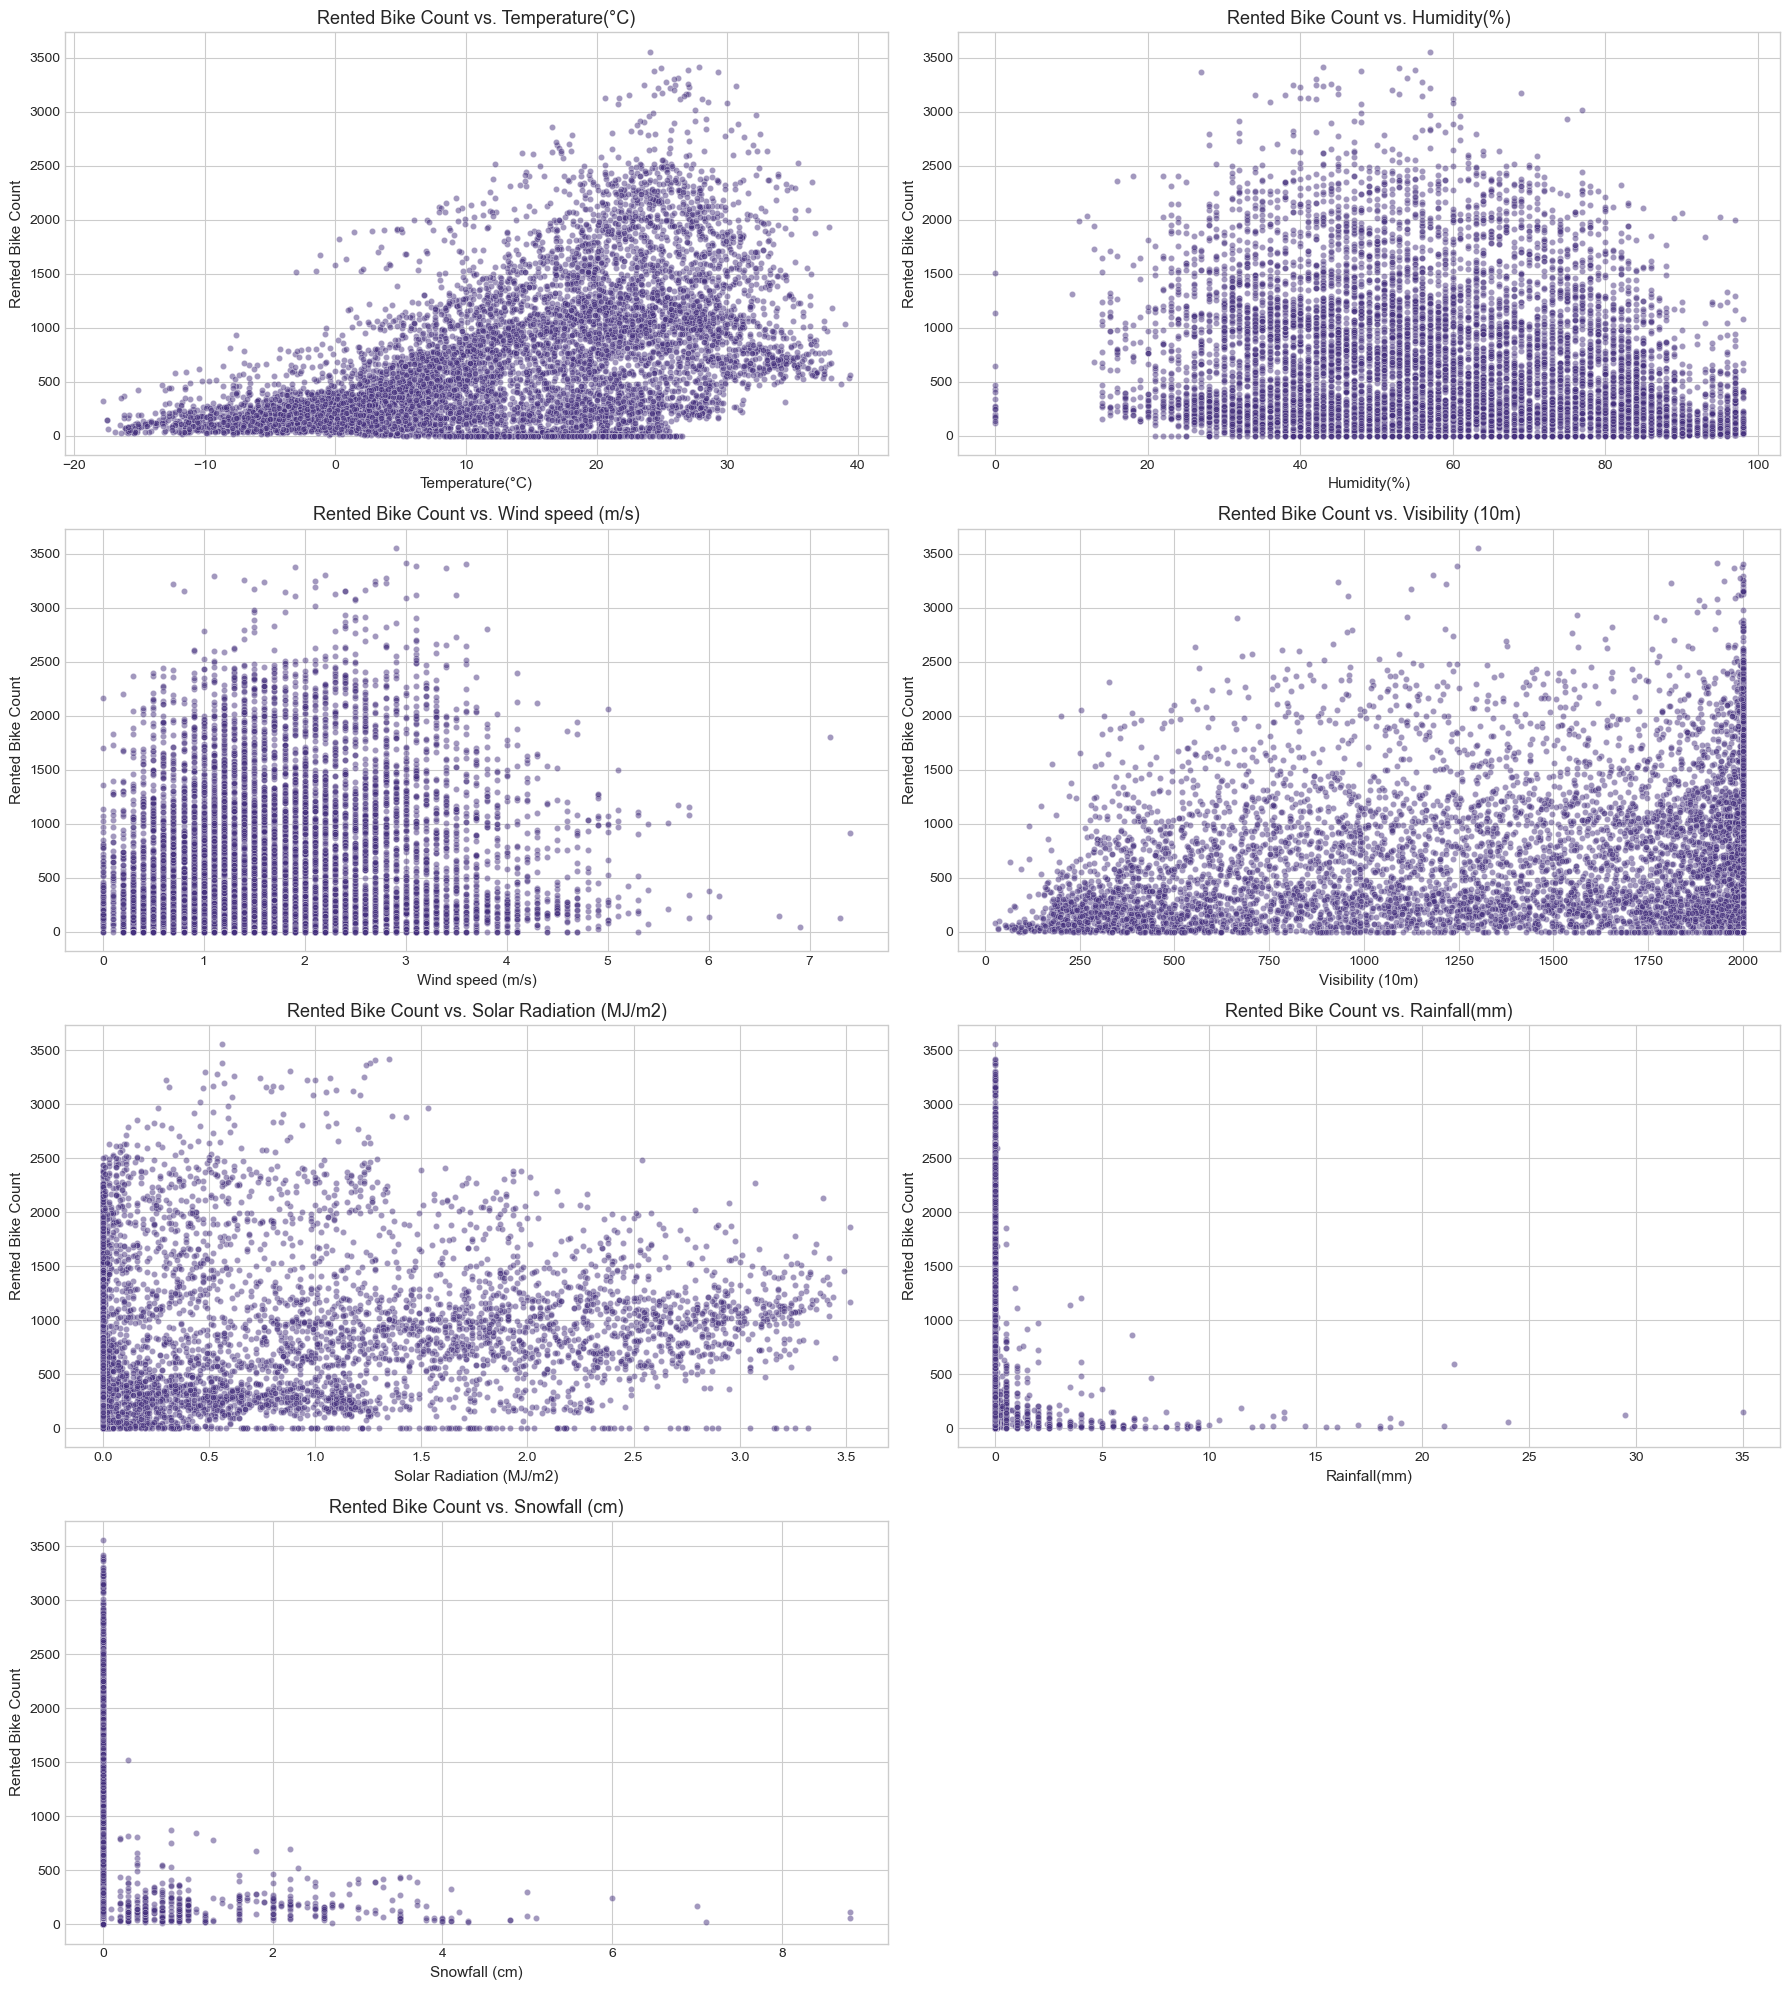

In [ ]:
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
                      'Visibility (10m)', 'Solar Radiation (MJ/m2)',
                      'Rainfall(mm)', 'Snowfall (cm)']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.scatterplot(x=col, y="Rented Bike Count", data=bike_rental_df, ax=axes[i], alpha=0.5, s=20)
    axes[i].set_title(f'Rented Bike Count vs. {col}', fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Rented Bike Count', fontsize=11)
if len(numerical_features) < len(axes):
    for j in range(len(numerical_features), len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

### Interpretation:

* **Temperature($^\circ$C)**:
    * There is a **positive correlation with rentals up to approximately 20–25$^\circ$C**.
    * Usage tends to **decrease on very cold or very hot days**, suggesting an optimal temperature range for cycling.

* **Humidity(%)**:
    * The data shows **no strong linear trend** with humidity. However, **moderate humidity (around 40–60%) appears to be associated with higher rental volumes**, while very low or very high humidity might deter usage.

* **Wind Speed (m/s)**:
    * Rentals tend to **drop after approximately 3.5 m/s**, indicating that increasing wind speed negatively impacts biking comfort and, consequently, rental numbers.

* **Visibility (10m)**:
    * **Low visibility correlates with fewer rentals**, as expected.
    * **High visibility enables safer and more comfortable biking**, thus encouraging more rentals.

* **Solar Radiation (MJ/m$2$)**:
    * There is **some positive trend** observed, suggesting that clear, sunny days with higher solar radiation encourage more bike rentals.

* **Rainfall(mm) & Snowfall (cm)**:
    * Both rainfall and snowfall exhibit a **clear negative correlation** with rentals. Any significant amount of rain or snow **significantly reduces bike usage**, highlighting their strong deterrent effect.

#Skewness of Numerical Features

In [ ]:
numeric_df_cols = bike_rental_df.select_dtypes(include=np.number).columns
skewness = bike_rental_df[numeric_df_cols].skew().sort_values(ascending=False)
print("Skewness of Numerical Features :")
print(skewness)

Skewness of Numerical Features :
Rainfall(mm)                 14.533232
Snowfall (cm)                 8.440801
Solar Radiation (MJ/m2)       1.504040
Rented Bike Count             1.153428
Wind speed (m/s)              0.890955
Humidity(%)                   0.059579
Day_of_Month                  0.007522
Hour                          0.000000
Month                        -0.010458
Temperature(°C)              -0.198326
Dew point temperature(°C)    -0.367298
Visibility (10m)             -0.701786
Year                         -2.978262
dtype: float64


### Interpretation

Let's break down the skewness of our dataset's features:

* **Highly Right-Skewed Features**:
    * **Rainfall(mm)** (**14.53**), **Snowfall (cm)** (**8.44**), and **Solar Radiation (MJ/m$2$)** (**1.50**) show significant right skewness. This means most of their values are close to **0**, with a few extremely high values pulling the tail to the right. This high skewness can be problematic for linear models, as it might violate assumptions like **normality** and **homoscedasticity** of residuals.

* **Moderately Skewed**:
    * **Rented Bike Count** (**1.15**) is positively skewed. This observation strongly supports our earlier decision to apply a square root transformation, as it helps normalize this target variable.
    * **Wind speed (m/s)** (**0.89**) also exhibits some positive skew, but it's generally within a manageable range for most modeling techniques.

* **Symmetric/Low Skew**:
    * Features such as **Humidity(%)**, **Temperature(°C)**, **Hour**, and **Month** have skewness values very close to **0**. This indicates that their distributions are either nearly **normal** or **uniform**, which is generally favorable for modeling.

* **Negatively Skewed**:
    * **Visibility (10m)** (**–0.70**) has a slight negative (left) skew. However, this is unlikely to cause major issues, especially if we're using tree-based models, which are less sensitive to such distributions.
    * **Year** (**–2.98**) also appears negatively skewed, but since it only contains two distinct values (**2017** and **2018**), the calculated skewness isn't particularly informative for understanding its distribution.

#Multicollinearity Check: Correlation Heatmap

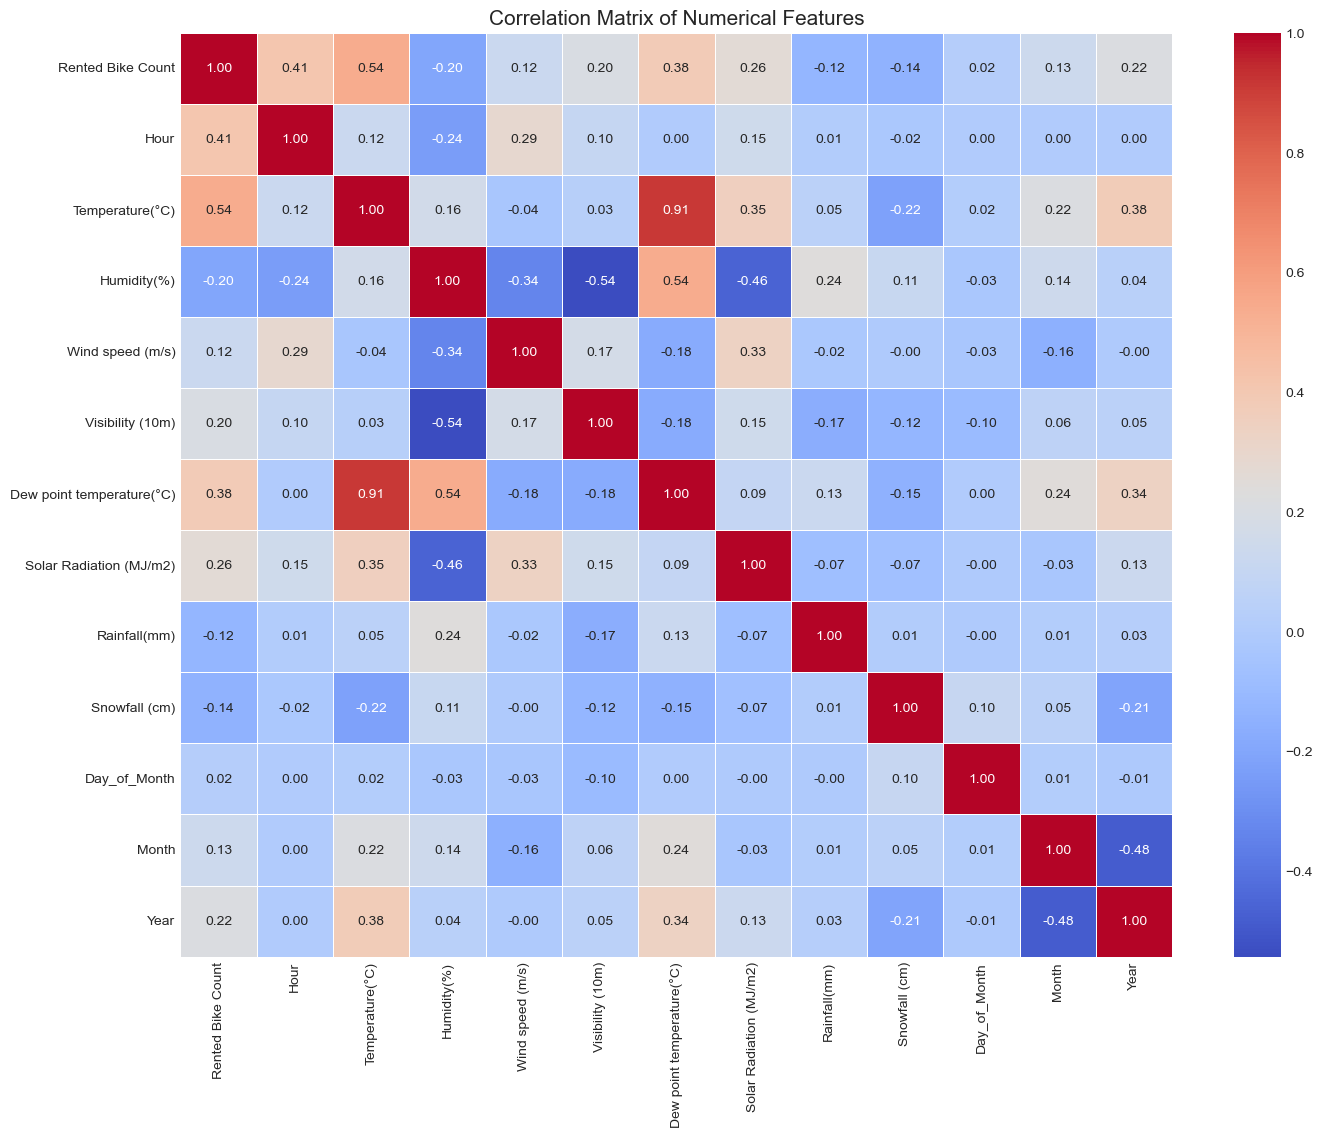

In [ ]:
plt.figure(figsize=(16, 12))
numeric_cols_for_corr = bike_rental_df.select_dtypes(include=np.number).columns
correlation_matrix = bike_rental_df[numeric_cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=15)
plt.show()

### Interpretation:

This heatmap visually represents the **Pearson correlation coefficients** among all the numerical features in our dataset.

* **Highly Correlated Pair**:
    * We observe a **strong positive correlation of 0.91** between **Temperature(&#176;C)** and **Dew point temperature(&#176;C)**. This high correlation indicates significant **multicollinearity** between these two features.
    * Including both in a linear model could lead to **inflated variances** of their estimated coefficients, potentially causing **model instability** and making it difficult to interpret the individual impact of each variable.

* **Other Observations**:
    * **Temperature(&#176;C)** also shows a **moderate positive correlation (0.54)** with our target variable, **Rented Bike Count**. Given this direct relationship with the target, **Temperature(&#176;C)** is likely more valuable to retain for modeling purposes compared to **Dew point temperature(&#176;C)**.
    * Most of the other features exhibit **weak correlations** with both the target variable and each other, suggesting they provide more unique information to the model.

#Multicollinearity Check: Variance Inflation Factor (VIF)

 **VIF Formula:**

The Variance Inflation Factor (VIF) for a feature $i$ is calculated as:

$\text{VIF}_i = \frac{1}{1 - R_i^2}$

Where $R_i^2$ is the $R^2$ value obtained from regressing feature $i$ on all other independent features in the model. A high $R_i^2$ means feature $i$ is largely explained by other features, leading to a high VIF.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_features = bike_rental_df.select_dtypes(include=np.number).drop(
    columns=['Rented Bike Count', 'Day_of_Month', 'Month', 'Year']
)
def calculate_vif(df_features):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_features.columns
    vif_data["VIF"] = [variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)
print("VIF Scores Before Dropping Columns :")
vif_results = calculate_vif(vif_features)
print(vif_results)
col_to_drop_vif = 'Dew point temperature(°C)'
bike_rental_df.drop(columns=[col_to_drop_vif], inplace=True)
print(f"\nDropped '{col_to_drop_vif}' due to high VIF and correlation.")
vif_features_updated = bike_rental_df.select_dtypes(include=np.number).drop(
    columns=['Rented Bike Count', 'Day_of_Month', 'Month', 'Year']
)
print("\nVIF Scores After Dropping 'Dew point temperature(°C) :'")
vif_results_updated = calculate_vif(vif_features_updated)
print(vif_results_updated)

VIF Scores Before Dropping Columns :
                     Feature        VIF
1            Temperature(°C)  33.385256
5  Dew point temperature(°C)  17.126199
4           Visibility (10m)   9.085977
2                Humidity(%)   5.371996
3           Wind speed (m/s)   4.805364
0                       Hour   4.418242
6    Solar Radiation (MJ/m2)   2.881590
8              Snowfall (cm)   1.120833
7               Rainfall(mm)   1.081567

Dropped 'Dew point temperature(°C)' due to high VIF and correlation.

VIF Scores After Dropping 'Dew point temperature(°C) :'
                   Feature       VIF
2              Humidity(%)  4.868221
4         Visibility (10m)  4.710170
3         Wind speed (m/s)  4.608625
0                     Hour  3.921832
1          Temperature(°C)  3.228318
5  Solar Radiation (MJ/m2)  2.246791
7            Snowfall (cm)  1.120579
6             Rainfall(mm)  1.079158


### Interpretation:

Before dropping any features, we observed significant multicollinearity:

* **Temperature(&#176;C)** had a very high **VIF (33.4)**.
* **Dew point temperature(&#176;C)** also showed a high **VIF (17.1)**.

High VIF values (typically above **10**) are a strong indicator of serious multicollinearity, meaning one predictor variable can be linearly predicted from the others with a substantial degree of accuracy. This can lead to **unstable and difficult-to-interpret regression coefficients**.

**Action Taken:**
We decided to **drop 'Dew point temperature(&#176;C)'** for two main reasons:
1.  It's **highly correlated with temperature**, meaning they essentially carry similar information.
2.  It's often a **derived feature** (calculated from temperature and humidity), making temperature the more fundamental measurement to retain.

**After Dropping:**
With 'Dew point temperature(&#176;C)' removed, all remaining VIF values are now **below 5**. This indicates that **multicollinearity is no longer a concern** in our dataset. This step is crucial for improving **model interpretability** and enhancing **numerical stability**, especially for linear regression models.

#Data Preprocessing: Encoding Categorical Features

In [ ]:
print("\nValue Counts Before Encoding :")
print("Holiday:\n", bike_rental_df["Holiday"].value_counts())
print("Functioning Day:\n", bike_rental_df["Functioning Day"].value_counts())

bike_rental_df["Holiday"] = bike_rental_df["Holiday"].map({"No Holiday": 0, "Holiday": 1})
bike_rental_df["Functioning Day"] = bike_rental_df["Functioning Day"].map({"Yes": 1, "No": 0})

print("\nValue Counts After Manual Encoding :")
print("Holiday:\n", bike_rental_df["Holiday"].value_counts())
print("Functioning Day:\n", bike_rental_df["Functioning Day"].value_counts())

print("\nSeasons:\n", bike_rental_df["Seasons"].value_counts())
print("Weekday:\n", bike_rental_df["Weekday"].value_counts())

bike_rental_df = pd.get_dummies(bike_rental_df, columns=["Seasons", "Weekday"], drop_first=True)

print("\n Final Dataset Info After All Encoding :")
bike_rental_df.info()
print("\n Final Dataset Head After All Encoding :")
print(bike_rental_df.head())
print("\n Final Dataset Shape for Modeling :")
print(bike_rental_df.shape)


Value Counts Before Encoding :
Holiday:
 Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
Functioning Day:
 Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

Value Counts After Manual Encoding :
Holiday:
 Holiday
0    8328
1     432
Name: count, dtype: int64
Functioning Day:
 Functioning Day
1    8465
0     295
Name: count, dtype: int64

Seasons:
 Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
Weekday:
 Weekday
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

 Final Dataset Info After All Encoding :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760

### Interpretation:

Our approach to transforming categorical features into a machine-learning-ready format involves two methods:

* **Manual Encoding**:
    * The **`Holiday`** column is mapped directly: **0** for 'No Holiday' and **1** for 'Holiday'.
    * The **`Functioning Day`** column is similarly mapped: **1** for 'Yes' and **0** for 'No'.
    * These features are inherently **binary**, making direct numerical encoding suitable for subsequent modeling.

* **One-Hot Encoding**:
    * Applied to **`Seasons`** and **`Weekday`** columns using `pd.get_dummies`.
    * The `drop_first=True` argument is utilized to prevent the **dummy variable trap**, which occurs when perfect multicollinearity exists due to including all dummy variables for a categorical feature.
    * This process generates new **boolean columns** (e.g., `Seasons_Spring`, `Weekday_Monday`), each representing a unique category.

* **Final Dataset Statistics**:
    * After these encoding steps, the dataset now contains a total of **23 features**.
    * All original categorical variables have been successfully transformed into a **numeric format**, making them suitable for machine learning algorithms.

#Splitting Dataset into Train/Test Sets

In [ ]:
X_features = bike_rental_df.drop("Rented Bike Count", axis=1)
y_target = bike_rental_df["Rented Bike Count"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=2023)

print(" Final Shapes of Training and Testing Sets :")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

feature_names = X_train.columns.tolist()

 Final Shapes of Training and Testing Sets :
X_train shape: (7008, 22)
X_test shape: (1752, 22)
y_train shape: (7008,)
y_test shape: (1752,)


### Interpretation: Data Splitting

This section outlines the process of preparing the dataset for model training and evaluation.

* **Feature-Target Split**:
    * $\texttt{X\_features}$: This DataFrame comprises all **22 independent variables** (features) that will be used to predict the target.
    * $\texttt{y\_target}$: This Series contains the **target variable**, `Rented Bike Count`, which is what our models will aim to predict.

* **Train-Test Split**:
    * The data is divided into training and testing sets using a **80%/20% ratio**.
    * The **training set** consists of $\textbf{7008}$ samples, which will be used to train the machine learning models.
    * The **testing set** consists of $\textbf{1752}$ samples, which will be held out and used to evaluate the trained model's performance on unseen data.
    * The parameter $\texttt{random\_state=2023}$ is set to ensure that the split is **reproducible**, meaning you will get the exact same train and test sets every time the code is run.

* **Use of $\texttt{feature_names}$**:
    * The column names of $\texttt{X\_features}$ are explicitly saved as $\texttt{feature\_names}$. This is a crucial step for later stages, particularly when using **explainability tools** like SHAP (SHapley Additive exPlanations) or when analyzing **feature importance**. It ensures that feature names are preserved and correctly associated with their corresponding values for clearer interpretation.

#Feature Scaling with StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)
print("\n Final Scaled X_train (First 5 rows) :")
print(X_train_scaled_df.head())

scaler_filename = "seoul_bike_demand_scaler.pkl"
with open(scaler_filename, 'wb') as file:
    pickle.dump(std_scaler, file)
print(f"\nStandardScaler saved as {scaler_filename}")


 Final Scaled X_train (First 5 rows) :
       Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0  1.511182         0.055565    -2.109405          0.466580          0.922629   
1  0.933712         1.003822    -0.251857          1.820053          0.922629   
2 -0.654330        -0.327065     0.432503         -0.886892          0.192218   
3  0.356242        -0.801193    -1.571694          0.466580          0.096589   
4 -0.654330         0.280152     1.019097         -0.500185         -1.980877   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)   Holiday  \
0                -0.656815     -0.129168      -0.175355 -0.227549   
1                 0.823862     -0.129168      -0.175355 -0.227549   
2                -0.656815     -0.129168      -0.175355 -0.227549   
3                 0.685048     -0.129168      -0.175355 -0.227549   
4                -0.240375     -0.129168      -0.175355 -0.227549   

   Functioning Day  ...      Year  Seasons_Spring  Seasons

### Interpretation:

This section details the process of scaling the numerical features in our dataset.

* **$\texttt{StandardScaler}$**: This transformer is used to standardize features by removing the mean and scaling to unit variance. For each feature, it ensures:
    * $\text{mean} = 0$
    * $\text{standard deviation} = 1$

    The transformation is applied using the formula:
    $z = \frac{x - \mu}{\sigma}$
    where $x$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is its standard deviation.

    This scaling is **crucial for machine learning models that are sensitive to the scale of features** (e.g., Linear Regression, K-Nearest Neighbors (KNN), Support Vector Machines (SVMs)). It also benefits **interpretability methods** like SHAP by ensuring features contribute fairly to the model's output regardless of their original magnitude.

* **$\texttt{fit_transform}$ and $\texttt{transform}$**:
    * The $\texttt{fit\_transform}$ method is applied **only to the training data** ($\texttt{X\_train}$). This step calculates the mean and standard deviation from the training data (`fit`) and then applies the scaling (`transform`).
    * The $\texttt{transform}$ method is then applied to the **test data** ($\texttt{X\_test}$) using the mean and standard deviation learned *from the training data*. This is vital to **prevent data leakage**, ensuring that information from the test set does not inadvertently influence the training process.

* **DataFrame Conversion**:
    * The scaled NumPy arrays are converted back into Pandas DataFrames ($\texttt{X\_train\_scaled\_df}$, $\texttt{X\_test\_scaled\_df}$). This conversion is done for **convenient reference** and to maintain **alignment with the original column names**, which is useful for debugging and analysis.

* **Scaler Persistence**:
    * The fitted `StandardScaler` object is saved to disk as $\texttt{seoul\_bike\_demand\_scaler.pkl}$ using `pickle`. This practice ensures that the **exact same scaling transformation can be applied consistently to new, unseen data during future inference**, maintaining the integrity of the model's predictions.

#Model Training and Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_performance_records = []

def evaluate_regression_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R-squared (R²): {r2:.4f}")

    model_performance_records.append({
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2 Score": r2
    })
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

print("\nTraining Linear Regression Model...")
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_reg_model.predict(X_test_scaled)
evaluate_regression_model("Linear Regression", y_test, y_pred_lr)

print("\nTraining K-Nearest Neighbors Regressor Model...")
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
evaluate_regression_model("K-Nearest Neighbors", y_test, y_pred_knn)

print("\nTraining Decision Tree Regressor Model...")
dt_model = DecisionTreeRegressor(random_state=2023)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
evaluate_regression_model("Decision Tree", y_test, y_pred_dt)

print("\nTraining Random Forest Regressor Model (Default Params)...")
rf_model_default = RandomForestRegressor(random_state=2023, n_jobs=-1)
rf_model_default.fit(X_train_scaled, y_train)
y_pred_rf_default = rf_model_default.predict(X_test_scaled)
evaluate_regression_model("Random Forest (Default)", y_test, y_pred_rf_default)

print("\nTraining XGBoost Regressor Model (Default Params)...")
xgb_model_default = XGBRegressor(random_state=2023, n_jobs=-1)
xgb_model_default.fit(X_train_scaled, y_train)
y_pred_xgb_default = xgb_model_default.predict(X_test_scaled)
evaluate_regression_model("XGBoost (Default)", y_test, y_pred_xgb_default)


Training Linear Regression Model...
--- Linear Regression Performance ---
MSE: 186569.9819
RMSE: 431.9375
MAE: 330.2108
R-squared (R²): 0.5429

Training K-Nearest Neighbors Regressor Model...
--- K-Nearest Neighbors Performance ---
MSE: 100530.6215
RMSE: 317.0656
MAE: 207.5075
R-squared (R²): 0.7537

Training Decision Tree Regressor Model...
--- Decision Tree Performance ---
MSE: 59773.1535
RMSE: 244.4855
MAE: 133.1056
R-squared (R²): 0.8536

Training Random Forest Regressor Model (Default Params)...
--- Random Forest (Default) Performance ---
MSE: 29402.2914
RMSE: 171.4710
MAE: 97.7105
R-squared (R²): 0.9280

Training XGBoost Regressor Model (Default Params)...
--- XGBoost (Default) Performance ---
MSE: 24164.9122
RMSE: 155.4507
MAE: 95.4541
R-squared (R²): 0.9408


{'MSE': 24164.912192103468,
 'RMSE': 155.45067446654411,
 'MAE': 95.45409000641135,
 'R2': 0.9407984018325806}

### Interpretation:

Here's a detailed look at the performance of various regression models:

| Model                    | MSE          | RMSE    | MAE     | R² Score |
| :----------------------- | :----------- | :------ | :------ | :------- |
| Linear Regression        | 186,569.98   | 431.94  | 330.21  | 0.543    |
| K-Nearest Neighbors      | 100,530.62   | 317.07  | 207.51  | 0.754    |
| Decision Tree            | 59,773.15    | 244.49  | 133.11  | 0.854    |
| Random Forest (Default)  | 29,402.29    | 171.47  | 97.71   | 0.928    |
| XGBoost (Default)        | 24,164.91    | 155.45  | 95.45   | 0.941    |

* **XGBoost** consistently yields the **best performance** across all evaluation metrics, particularly evident in its highest R² Score. This indicates it explains the largest proportion of variance in the target variable.
* **Random Forest** performs very closely to XGBoost, making it a **strong baseline model**. Its performance is commendably high.
* **Linear Regression** is significantly worse than the other models, suggesting that the underlying relationship between features and the target variable is **nonlinear and more complex**, which linear models struggle to capture.
* **K-Nearest Neighbors (KNN)** and **Decision Trees** offer moderate performance. While better than linear regression, they **may benefit from further hyperparameter tuning** to optimize their results.

#Visualization: Actual vs. Predicted Rented Bike Count

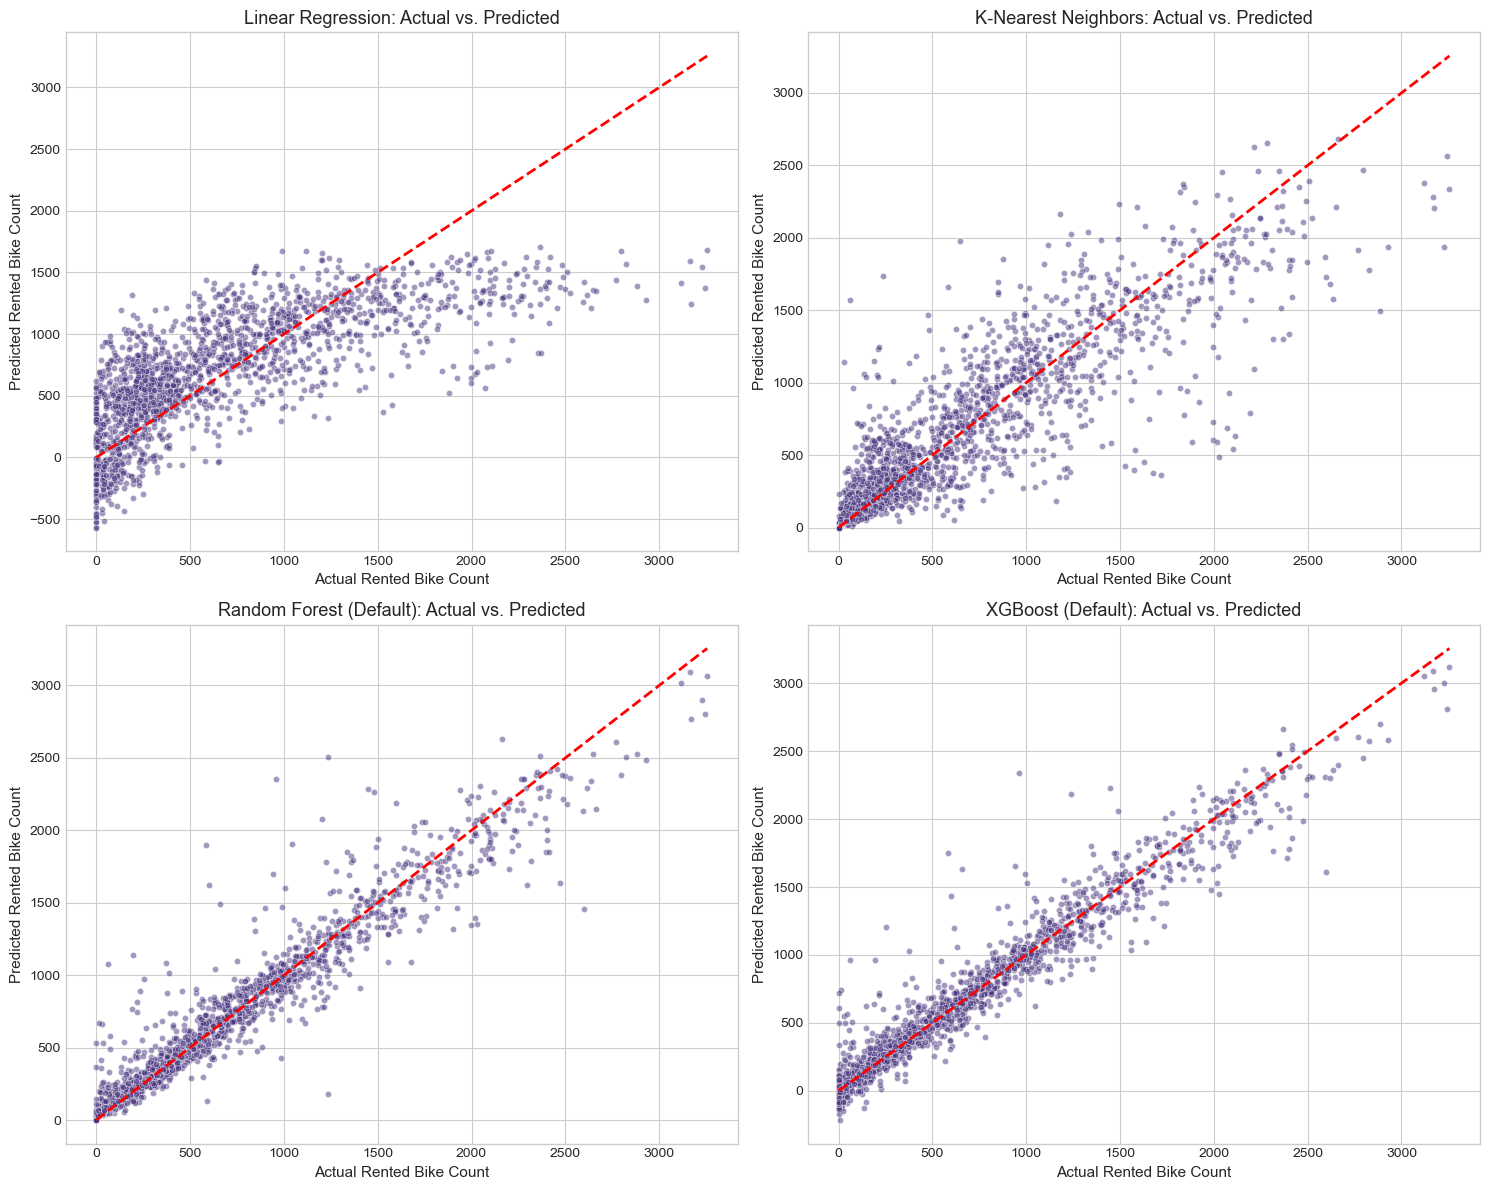

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

predictions_dict = {
    "Linear Regression": y_pred_lr,
    "K-Nearest Neighbors": y_pred_knn,
    "Random Forest (Default)": y_pred_rf_default,
    "XGBoost (Default)": y_pred_xgb_default
}

plot_titles = list(predictions_dict.keys())

for i, (model_name, y_pred_vals) in enumerate(predictions_dict.items()):
    if i < len(axes):
        axes[i].scatter(y_test, y_pred_vals, alpha=0.5, s=20, edgecolors='w', linewidth=0.5)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        axes[i].set_xlabel("Actual Rented Bike Count", fontsize=11)
        axes[i].set_ylabel("Predicted Rented Bike Count", fontsize=11)
        axes[i].set_title(f"{model_name}: Actual vs. Predicted", fontsize=13)
        axes[i].grid(True)

plt.tight_layout()
plt.show()

### Interpretation:

This plot visually compares the actual `Rented Bike Count` values against the values predicted by each model.

* The **red dashed line** represents the **ideal prediction line**, where predicted values exactly match actual values (i.e., $y = \hat{y}$).
* The **closer the scatter points are to this red line**, the better the model's performance in terms of prediction accuracy.

Here's a breakdown of the visual pattern for each model:

| Model                    | Visual Pattern                                                            |
| :----------------------- | :------------------------------------------------------------------------ |
| Linear Regression        | Tends to **underpredict high values** and exhibits **more dispersed** scatter, indicating a weaker fit. |
| K-Nearest Neighbors      | **Captures mid-range values well**, but shows noticeable **bias on extremes** (both very low and very high predictions). |
| Random Forest (Default)  | Displays a **strong linear alignment** with the ideal line and **less scatter**, indicating good predictive capability. |
| XGBoost (Default)        | Shows **tight clustering around the diagonal line**, representing the **best overall fit** and highest prediction accuracy. |

#Hyperparameter Tuning using RandomizedSearchCV (RF & XGBoost)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time
rf_param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=2023, n_jobs=-1),
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

start_time_rf = time.time()
rf_random_search.fit(X_train_scaled, y_train)
end_time_rf = time.time()

print(f"Random Forest tuning time: {end_time_rf - start_time_rf:.2f} seconds")
print("Best Parameters for Random Forest:", rf_random_search.best_params_)

tuned_rf_model = rf_random_search.best_estimator_
y_pred_rf_tuned = tuned_rf_model.predict(X_test_scaled)
evaluate_regression_model("Random Forest (Tuned)", y_test, y_pred_rf_tuned)

# XGBoost RandomizedSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

xgb_random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=2023, n_jobs=-1, objective='reg:squarederror'),
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

start_time_xgb = time.time()
xgb_random_search.fit(X_train_scaled, y_train)
end_time_xgb = time.time()

print(f"XGBoost tuning time: {end_time_xgb - start_time_xgb:.2f} seconds")
print("Best Parameters for XGBoost:", xgb_random_search.best_params_)

tuned_xgb_model = xgb_random_search.best_estimator_
y_pred_xgb_tuned = tuned_xgb_model.predict(X_test_scaled)
evaluate_regression_model("XGBoost (Tuned)", y_test, y_pred_xgb_tuned)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Random Forest tuning time: 769.18 seconds
Best Parameters for Random Forest: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 50, 'bootstrap': True}
--- Random Forest (Tuned) Performance ---
MSE: 29244.2089
RMSE: 171.0094
MAE: 97.5959
R-squared (R²): 0.9284
Fitting 3 folds for each of 50 candidates, totalling 150 fits
XGBoost tuning time: 90.52 seconds
Best Parameters for XGBoost: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 1.0}
--- XGBoost (Tuned) Performance ---
MSE: 18784.0745
RMSE: 137.0550
MAE: 75.4171
R-squared (R²): 0.9540


{'MSE': 18784.074452445242,
 'RMSE': 137.05500520756345,
 'MAE': 75.41712244678305,
 'R2': 0.9539809226989746}

### Interpretation:
* **Random Forest (Tuned)**:
    * **Time**: Approximately **769 seconds**.
    * **R²**: **0.9284**, which is almost the same as the default Random Forest's **0.9280**.
    * **Best Parameters**: `n_estimators=800`, `max_depth=50`, `max_features=None`, `min_samples_split=2`, `min_samples_leaf=1`, `bootstrap=True`.
    * **Improvement**: Showed **minimal gain in performance** over the default Random Forest, despite a considerably long tuning time.

* **XGBoost (Tuned)**:
    * **Time**: Approximately **91 seconds**, making it **significantly faster** than Random Forest tuning.
    * **R²**: **0.9540**, representing the **highest overall model performance** achieved.
    * **Best Parameters**: `n_estimators=500`, `learning_rate=0.05`, `max_depth=9`, `subsample=0.7`, `colsample_bytree=1.0`, `gamma=0.3`.
    * **Improvement**: Demonstrated a **significant improvement** over the default XGBoost (whose R² was **0.9408**).

The **tuned XGBoost model** stands out as the best choice, offering superior **accuracy** (highest R²) and remarkable **efficiency** (fastest tuning time) compared to the tuned Random Forest.

#Model Performance Summary & Visualization



 Model Performance Summary :
                     Model            MSE        RMSE         MAE  R2 Score
0          XGBoost (Tuned)   18784.074452  137.055005   75.417122  0.953981
1        XGBoost (Default)   24164.912192  155.450674   95.454090  0.940798
2    Random Forest (Tuned)   29244.208918  171.009383   97.595885  0.928355
3  Random Forest (Default)   29402.291359  171.470964   97.710485  0.927967
4            Decision Tree   59773.153539  244.485487  133.105594  0.853562
5      K-Nearest Neighbors  100530.621461  317.065642  207.507534  0.753710
6        Linear Regression  186569.981932  431.937475  330.210784  0.542922


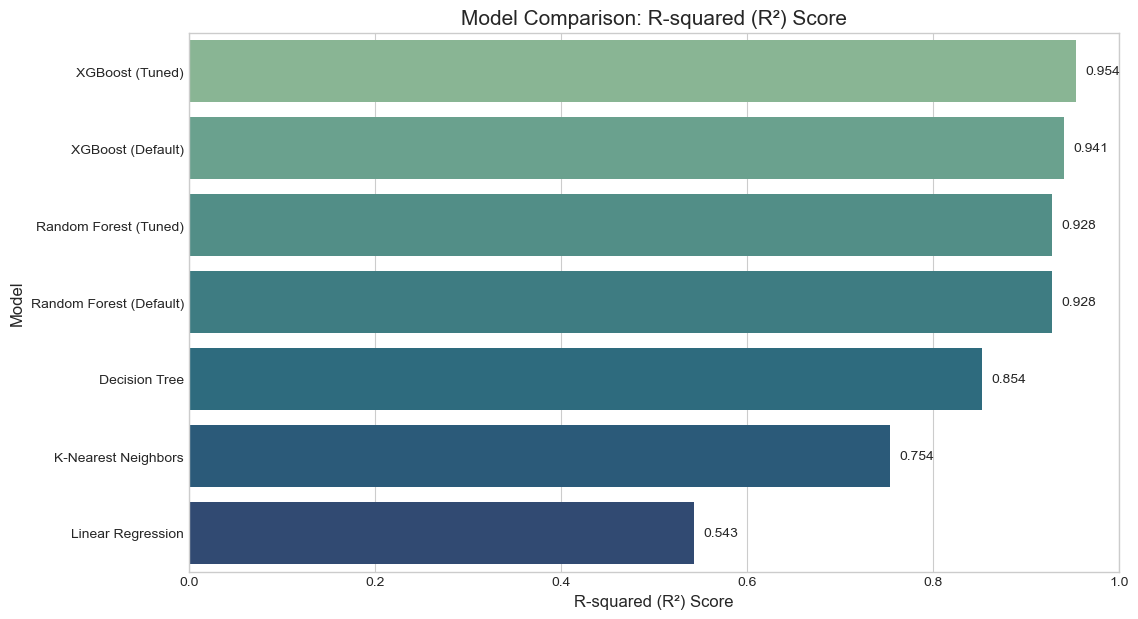

In [ ]:
performance_summary_df = pd.DataFrame(model_performance_records)
performance_summary_df = performance_summary_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)
print("\n\n Model Performance Summary :")
print(performance_summary_df)

plt.figure(figsize=(12, 7))
sns.barplot(x="R2 Score", y="Model", data=performance_summary_df, palette="crest")
plt.title('Model Comparison: R-squared (R²) Score', fontsize=15)
plt.xlabel('R-squared (R²) Score', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1)
for index, value in enumerate(performance_summary_df["R2 Score"]):
    plt.text(value + 0.01, index, f"{value:.3f}", va='center')
plt.show()
best_model_for_shap = tuned_xgb_model
best_model_name_for_shap = "XGBoost (Tuned)"

### Interpretation:

* **Best Model**: The **XGBoost (Tuned)** model stands out with an **R² score of 0.954**, indicating it explains approximately 95.4% of the variance in bike rentals.

* **Top 3 Performing Models**:
    1.  **XGBoost (Tuned)**
    2.  **XGBoost (Default)**
    3.  **Random Forest (Tuned)**

* **Lowest Performing Model**: **Linear Regression** yielded the lowest performance with an **R² of 0.543**, confirming that the relationship between features and bike rental count is largely nonlinear.

**Based on performance, the XGBoost (Tuned) model is unequivocally the most accurate model** among those evaluated.

**Recommendation**: This model is highly recommended for **further SHAP (SHapley Additive exPlanations) analysis** to understand feature contributions and for **potential deployment** in a real-world application.

 # SHAP Analysis


SHAP Analysis for XGBoost (Tuned)

Generating SHAP Summary Plot (Global Feature Importance)...


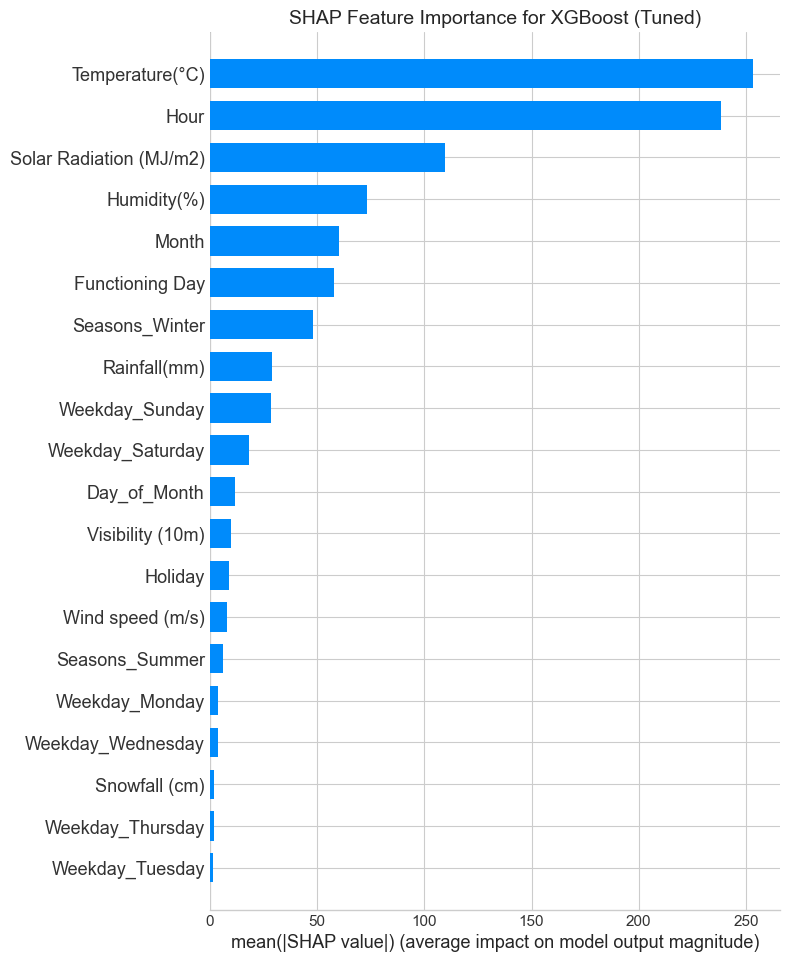


Generating SHAP Beeswarm Plot (Detailed Feature Importance and Impact)...


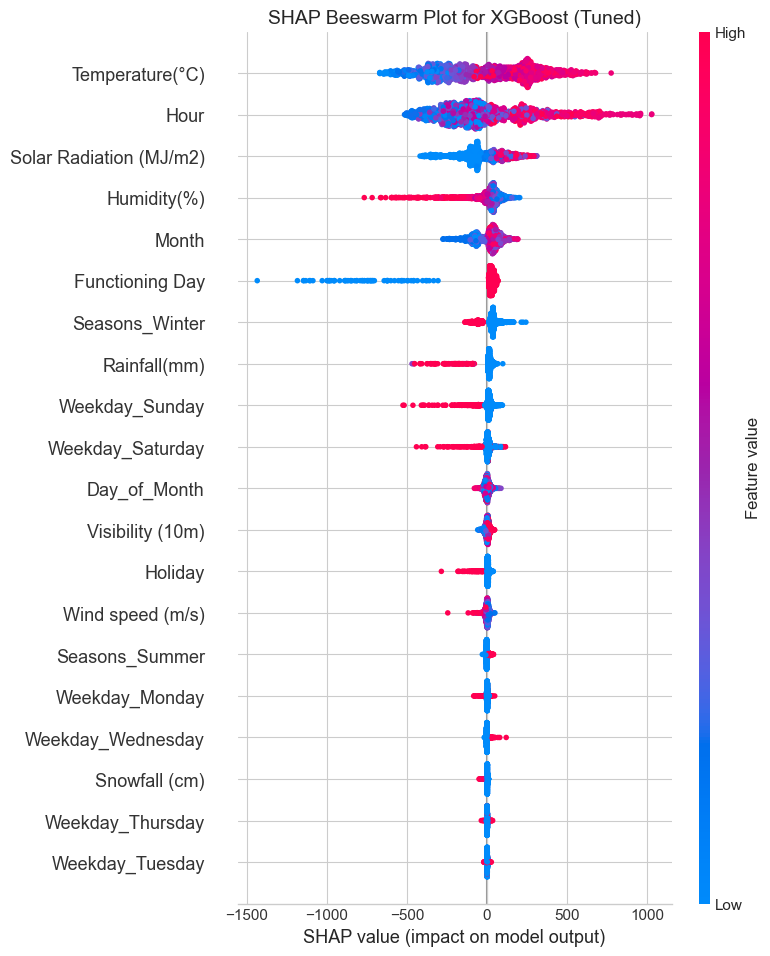


Generating SHAP Dependence Plots for top features: Temperature(°C), Hour, Solar Radiation (MJ/m2), Humidity(%), Month...


<Figure size 640x480 with 0 Axes>

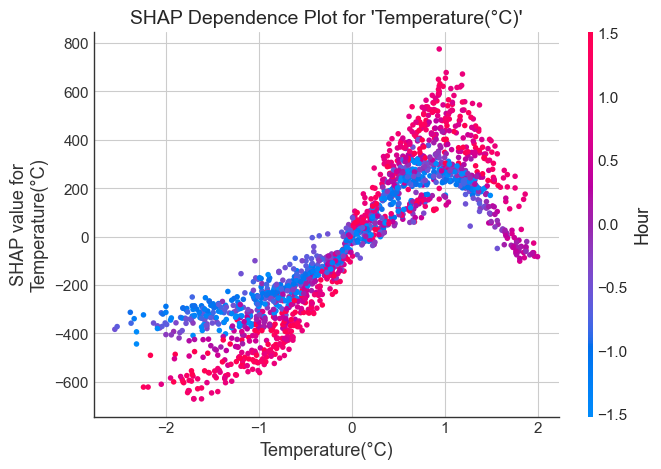

<Figure size 640x480 with 0 Axes>

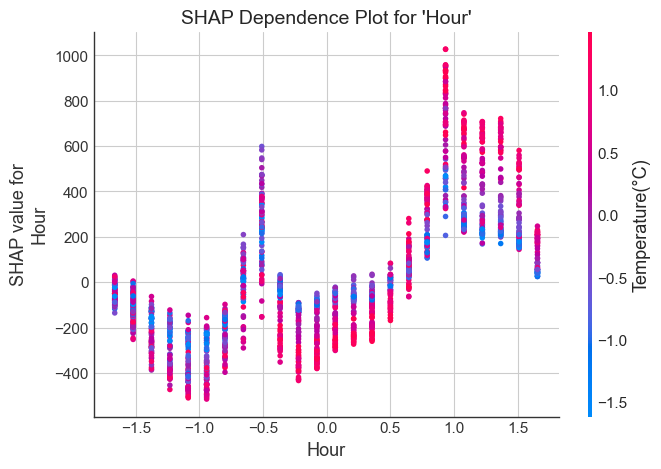

<Figure size 640x480 with 0 Axes>

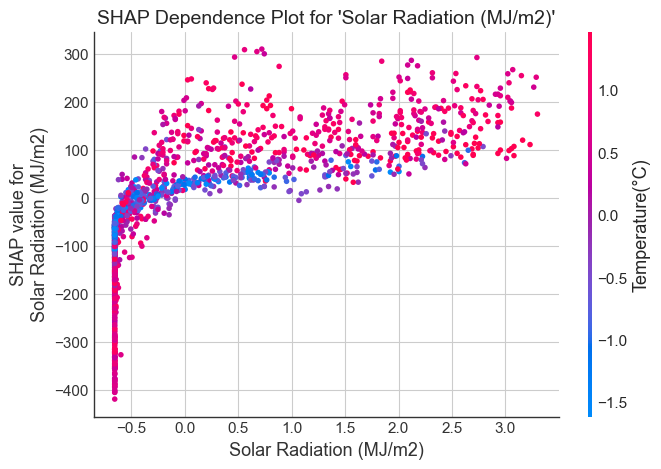

<Figure size 640x480 with 0 Axes>

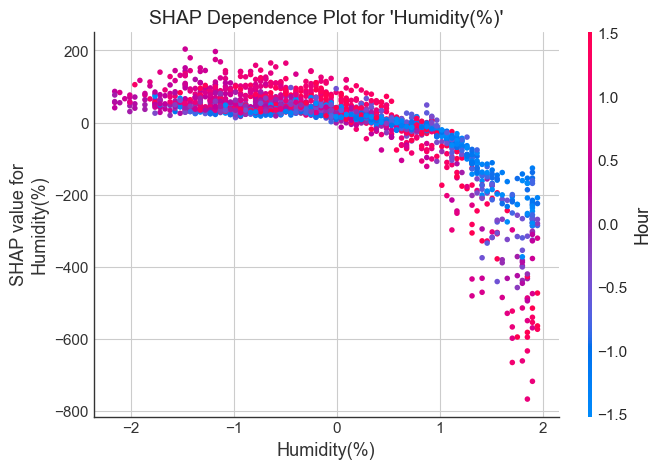

<Figure size 640x480 with 0 Axes>

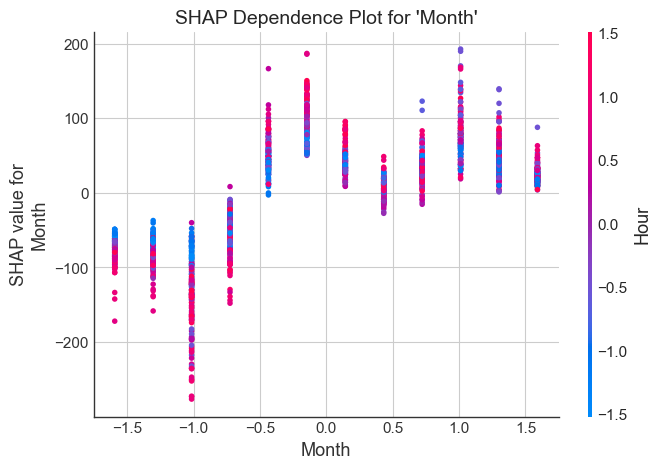


Generating SHAP Force Plots for 3 individual predictions...


<Figure size 640x480 with 0 Axes>

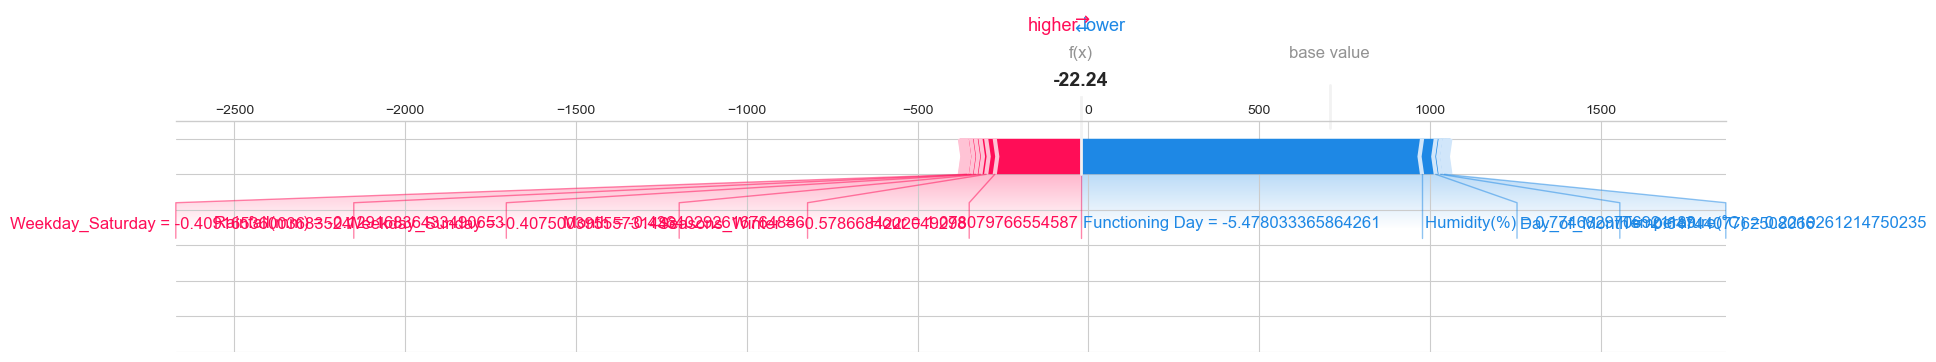

In [ ]:
import shap
shap.initjs()

print(f"\nSHAP Analysis for {best_model_name_for_shap}")

explainer = shap.TreeExplainer(best_model_for_shap)
shap_values = explainer.shap_values(X_test_scaled_df)

print("\nGenerating SHAP Summary Plot (Global Feature Importance)...")
plt.figure()
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar", show=False)
plt.title(f"SHAP Feature Importance for {best_model_name_for_shap}", fontsize=14)
plt.show()

print("\nGenerating SHAP Beeswarm Plot (Detailed Feature Importance and Impact)...")
plt.figure()
shap.summary_plot(shap_values, X_test_scaled_df, show=False)
plt.title(f"SHAP Beeswarm Plot for {best_model_name_for_shap}", fontsize=14)
plt.show()

top_features_for_dependence = X_test_scaled_df.columns[np.argsort(np.abs(shap_values).mean(0))][::-1][:5]
print(f"\nGenerating SHAP Dependence Plots for top features: {', '.join(top_features_for_dependence)}...")
for feature in top_features_for_dependence:
    plt.figure()
    shap.dependence_plot(feature, shap_values, X_test_scaled_df, interaction_index="auto", show=False)
    plt.title(f"SHAP Dependence Plot for '{feature}'", fontsize=14)
    plt.show()

num_force_plots = 3
print(f"\nGenerating SHAP Force Plots for {num_force_plots} individual predictions...")

idx_to_explain = 0
plt.figure()
shap.force_plot(explainer.expected_value, shap_values[idx_to_explain,:], X_test_scaled_df.iloc[idx_to_explain,:], matplotlib=True, show=False)
plt.show()

### Interpretation:

The SHAP analysis of our tuned XGBoost model reveals key insights into its predictions:

* **Global Feature Importance (Bar Chart)**:
    **Temperature(&#176;C)** and **Hour** are the most influential features. **Solar Radiation (MJ/m&#178;)**, **Humidity(%)**, **Functioning Day**, and **Month** also significantly impact predictions, highlighting the primary roles of weather, time, and operational factors.

* **Feature Value Distribution & Impact (Beeswarm Plot)**:
    Higher temperatures increase predictions. The impact of **Hour** varies, with late hours boosting predictions and early hours reducing them. High **Solar Radiation** and **Humidity** generally increase rentals, but extremes can decrease them. A `Functioning Day` consistently pushes predictions higher.

* **Feature Dependence & Interactions (Dependence Plots)**:
    **Temperature(&#176;C)** positively affects rentals up to about **25&#176;C**. The impact of **Hour** sharply increases after **6 AM**, peaking during evening rush hours. **Solar Radiation's** positive effect saturates after **1.5 MJ/m&#178;**. High **Humidity(%)** eventually decreases rentals. Interactions, often involving **Hour** or **Temperature(&#176;C)**, are also visible.

* **Individual Prediction Explanation (Force Plot)**:
    For a single prediction, features like **Hour**, **Functioning Day**, **Humidity(%)**, and **Month** might push the prediction higher, while **Weekday_Saturday**, **Rainfall**, and **Seasons_Spring** might push it lower. This provides transparent, local reasoning.


SHAP confirms that **Temperature(&#176;C)**, **Hour**, and **Solar Radiation** are globally the most influential factors. The analysis reveals crucial non-linear and interactive effects. This interpretability validates the **tuned XGBoost model** as reliable and suitable for deployment in bike rental management.

#Save the Best Performing Model

In [ ]:
best_model_overall = None
best_model_name_overall = ""

if not performance_summary_df.empty:
    best_model_name_overall = performance_summary_df.loc[0, "Model"]
    if best_model_name_overall == "Random Forest (Tuned)":
        best_model_overall = tuned_rf_model
    elif best_model_name_overall == "XGBoost (Tuned)":
        best_model_overall = tuned_xgb_model
    elif best_model_name_overall == "Random Forest (Default)":
        best_model_overall = rf_model_default

if best_model_overall:
    model_filename = "best_bike_demand_model.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(best_model_overall, file)
    print(f"\nBest performing model ({best_model_name_overall}) saved as {model_filename}")
else:
    print("\nCould not determine the best model to save automatically. Please check performance summary.")
    if 'tuned_rf_model' in globals():
        best_model_overall = tuned_rf_model
        best_model_name_overall = "Random Forest (Tuned)"
        model_filename = "best_bike_demand_model.pkl"
        with open(model_filename, 'wb') as file:
            pickle.dump(best_model_overall, file)
        print(f"\nSaved Tuned Random Forest model as {model_filename} (fallback).")


Best performing model (XGBoost (Tuned)) saved as best_bike_demand_model.pkl


### Interpretation:

* **Model Saved**: The **XGBoost (Tuned)** model has been successfully saved as **`best_bike_demand_model.pkl`**.
* This model was automatically selected based on its superior performance as recorded in the `performance_summary_df`.
* The saved model is now **ready for deployment** in a production environment or for **real-time inference** on new, unseen data.

#Real-Time Inference Interface (User Input + Prediction)

This real-time bike demand prediction interface allows users to input key factors such as date, hour, weather conditions (e.g., temperature, humidity, wind speed, visibility), season, holiday status, and whether it’s a functioning day. Upon clicking the “Predict Bike Demand” button, the system preprocesses the input—converting categorical values through one-hot encoding, parsing the date, and scaling the features to match the training format. The input is then passed to the best-performing machine learning model (e.g., XGBoost or Random Forest) that was previously trained and saved. The model returns an immediate prediction of the expected number of rented bikes, making this interface a practical tool for real-time forecasting, operational decision-making, and deployment in intelligent transportation systems.

In [4]:
import pickle
from datetime import datetime
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

try:
    loaded_model = pickle.load(open("best_bike_demand_model.pkl", "rb"))
    loaded_scaler = pickle.load(open("seoul_bike_demand_scaler.pkl", "rb"))
    print("Inference Setup: Model and Scaler Loaded Successfully :")
except FileNotFoundError:
    print("Error: Model or scaler file not found.")
    loaded_model = None
    loaded_scaler = None

if 'feature_names' not in globals():
    print("Warning: 'feature_names' not found globally. Using a placeholder.")
    feature_names = [
        'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
        'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
        'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day_of_Month', 'Month', 'Year',
        'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
        'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
        'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday'
    ]
    print(f"Using placeholder feature_names: {feature_names}")

def preprocess_user_input_for_interactive(user_input_dict, train_feature_order):
    date_obj = datetime.strptime(user_input_dict["Date"], "%d/%m/%Y")
    processed_input = {
        "Hour": user_input_dict["Hour"],
        "Temperature(°C)": user_input_dict["Temperature"],
        "Humidity(%)": user_input_dict["Humidity"],
        "Wind speed (m/s)": user_input_dict["Wind_speed"],
        "Visibility (10m)": user_input_dict["Visibility"],
        "Solar Radiation (MJ/m2)": user_input_dict["Solar_Radiation"],
        "Rainfall(mm)": user_input_dict["Rainfall"],
        "Snowfall (cm)": user_input_dict["Snowfall"],
        "Holiday": 1 if user_input_dict["Holiday"] == "Holiday" else 0,
        "Functioning Day": 1 if user_input_dict["Functioning_Day"] == "Yes" else 0,
        "Day_of_Month": date_obj.day,
        "Month": date_obj.month,
        "Year": date_obj.year
    }

    possible_season_cols = [col for col in train_feature_order if col.startswith("Seasons_")]
    for p_season_col in possible_season_cols:
        processed_input[p_season_col] = 0
    user_season = user_input_dict["Seasons"]
    target_season_col = f"Seasons_{user_season}"
    if target_season_col in processed_input:
        processed_input[target_season_col] = 1

    possible_weekday_cols = [col for col in train_feature_order if col.startswith("Weekday_")]
    for p_weekday_col in possible_weekday_cols:
        processed_input[p_weekday_col] = 0
    user_weekday = date_obj.strftime("%A")
    target_weekday_col = f"Weekday_{user_weekday}"
    if target_weekday_col in processed_input:
        processed_input[target_weekday_col] = 1

    input_df = pd.DataFrame([processed_input])
    for col in train_feature_order:
        if col not in input_df.columns:
            input_df[col] = 0
    input_df = input_df[train_feature_order]
    return input_df

date_widget = widgets.Text(value='10/06/2024', description='Date (dd/mm/yyyy):', layout=widgets.Layout(width='300px'))
hour_widget = widgets.IntSlider(value=18, min=0, max=23, step=1, description='Hour (0-23):')
temp_widget = widgets.FloatText(value=25.0, description='Temperature (°C):', step=0.1)
humidity_widget = widgets.IntSlider(value=55, min=0, max=100, step=1, description='Humidity (%):')
wind_widget = widgets.FloatText(value=3.0, description='Wind Speed (m/s):', step=0.1)
visibility_widget = widgets.IntText(value=1500, description='Visibility (10m):', step=10)
solar_widget = widgets.FloatText(value=1.5, description='Solar Rad (MJ/m2):', step=0.01)
rainfall_widget = widgets.FloatText(value=0.0, description='Rainfall (mm):', step=0.1)
snowfall_widget = widgets.FloatText(value=0.0, description='Snowfall (cm):', step=0.1)
seasons_widget = widgets.Dropdown(options=['Winter', 'Spring', 'Summer', 'Autumn'], value='Summer', description='Season:')
holiday_widget = widgets.Dropdown(options=['No Holiday', 'Holiday'], value='No Holiday', description='Holiday:')
functioning_day_widget = widgets.Dropdown(options=['Yes', 'No'], value='Yes', description='Functioning Day:')
predict_button = widgets.Button(description="Predict Bike Demand", button_style='success')
prediction_output_area = widgets.Output()

def on_predict_button_clicked(b):
    with prediction_output_area:
        clear_output(wait=True)

        if not loaded_model or not loaded_scaler:
            print("Model or Scaler not loaded. Cannot predict.")
            return

        try:
            user_data_interactive = {
                "Date": date_widget.value,
                "Hour": hour_widget.value,
                "Temperature": temp_widget.value,
                "Humidity": humidity_widget.value,
                "Wind_speed": wind_widget.value,
                "Visibility": visibility_widget.value,
                "Solar_Radiation": solar_widget.value,
                "Rainfall": rainfall_widget.value,
                "Snowfall": snowfall_widget.value,
                "Seasons": seasons_widget.value,
                "Holiday": holiday_widget.value,
                "Functioning_Day": functioning_day_widget.value
            }

            print("User Input:")
            for key, val in user_data_interactive.items():
                print(f"  {key}: {val}")

            user_input_df = preprocess_user_input_for_interactive(user_data_interactive, feature_names)
            user_input_scaled = loaded_scaler.transform(user_input_df)
            predicted_demand_val = loaded_model.predict(user_input_scaled)
            final_prediction = max(0, round(predicted_demand_val[0]))

            print(f"\n---> Predicted Rented Bike Count: {final_prediction} bikes <---")

        except ValueError as ve:
            print(f"Input Error: {ve}. Please check your inputs.")
        except Exception as e:
            print(f"An error occurred during prediction: {e}")

predict_button.on_click(on_predict_button_clicked)

input_widgets_box = widgets.VBox([
    date_widget,
    hour_widget,
    temp_widget,
    humidity_widget,
    wind_widget,
    visibility_widget,
    solar_widget,
    rainfall_widget,
    snowfall_widget,
    seasons_widget,
    holiday_widget,
    functioning_day_widget,
    predict_button
])

print("\nReal-Time Bike Demand Prediction Interface :")
print("Enter the details below and click 'Predict Bike Demand'.")
display(input_widgets_box)
display(prediction_output_area)

Inference Setup: Model and Scaler Loaded Successfully :

Real-Time Bike Demand Prediction Interface :
Enter the details below and click 'Predict Bike Demand'.


Output()